# The Impact of Differentiated Strategies in Mixed-Ability First Year Mathematics Classrooms
## Gabriele Spiridaviciute
***
### Code used to create graphs for ED-6201 Practioner Based Research Project

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

## Load Datasets

In [2]:
student_questionnaire_before_df = pd.read_csv('data/student_questionnaire_before.csv')
student_questionnaire_after_df = pd.read_csv('data/student_questionnaire_after.csv')

## Examine Datasets

In [3]:
student_questionnaire_before_df.head(5)

,like_choice_completing_assignments,feel_challenged,tech_helps,often_excited_interested_activities,design_own_activities,questionnaire_type
0,Maybe,No,Yes,No,"I like maths, but I don't always understand it.",Before
1,No,Yes,Yes,No,Group work can be confusing sometimes.,Before
2,Yes,No,Yes,No,Group work can be confusing sometimes.,Before
3,Maybe,No,Yes,No,"I like maths, but I don't always understand it.",Before
4,Yes,No,Yes,No,Group work can be confusing sometimes.,Before


In [4]:
student_questionnaire_after_df.head(5)

,like_choice_completing_assignments,feel_challenged,tech_helps,often_excited_interested_activities,design_own_activities,questionnaire_type
0,Yes,Yes,Yes,Yes,I liked trying different ways to learn.,After
1,Yes,Yes,Yes,Yes,It was easier to understand lessons.,After
2,Maybe,Yes,Yes,No,It was easier to understand lessons.,After
3,Yes,Yes,Yes,Yes,The new activities helped me enjoy maths more.,After
4,Yes,Yes,Yes,Yes,I feel more confident in maths now.,After


## Combine Before and After Datasets

In [5]:
merged_student_questionnaire_df = pd.concat([student_questionnaire_before_df, student_questionnaire_after_df], ignore_index=True)
display(merged_student_questionnaire_df.head(5))
display(merged_student_questionnaire_df.tail(5))

,like_choice_completing_assignments,feel_challenged,tech_helps,often_excited_interested_activities,design_own_activities,questionnaire_type
0,Maybe,No,Yes,No,"I like maths, but I don't always understand it.",Before
1,No,Yes,Yes,No,Group work can be confusing sometimes.,Before
2,Yes,No,Yes,No,Group work can be confusing sometimes.,Before
3,Maybe,No,Yes,No,"I like maths, but I don't always understand it.",Before
4,Yes,No,Yes,No,Group work can be confusing sometimes.,Before


,like_choice_completing_assignments,feel_challenged,tech_helps,often_excited_interested_activities,design_own_activities,questionnaire_type
53,Yes,Yes,Yes,Yes,I feel more included in class now.,After
54,Yes,Yes,Yes,Yes,The new activities helped me enjoy maths more.,After
55,Maybe,Yes,Yes,Yes,I feel more confident in maths now.,After
56,Yes,Yes,Yes,Yes,I feel more confident in maths now.,After
57,Yes,Yes,Yes,Yes,It was easier to understand lessons.,After


## Save Merged Dataset as .csv 

In [6]:
merged_student_questionnaire_df.to_csv('data/student_questionnaire_merged.csv')

## Impact of Differentiation on Assignment Choice Preference 

like_choice_completing_assignments,No,Maybe,Yes
questionnaire_type,,,
After,0,7,22
Before,2,19,8


like_choice_completing_assignments,No,Maybe,Yes
questionnaire_type,,,
After,0.000000,24.137931,75.862069
Before,6.896552,65.517241,27.586207


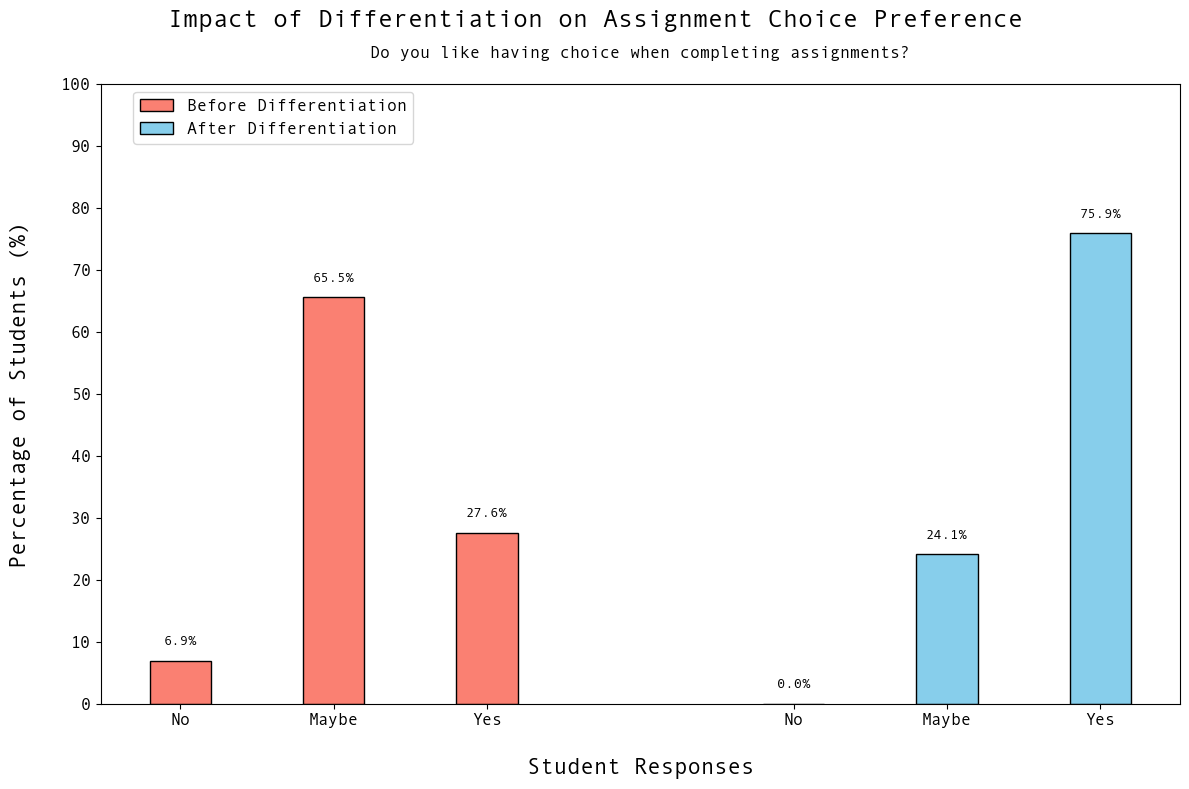

In [17]:
response_order = ['No', 'Maybe', 'Yes']

bar_width = 0.4
x_before = np.arange(len(response_order)) 
x_after = x_before + len(response_order) + 1 


q1_counts_raw = merged_student_questionnaire_df.groupby('questionnaire_type')['like_choice_completing_assignments'].value_counts().unstack(fill_value=0)[response_order]
display(q1_counts_raw)

q1_counts_percent = q1_counts_raw.div(q1_counts_raw.sum(axis=1), axis=0) * 100
display(q1_counts_percent)

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x_before, 
       q1_counts_percent.loc['Before'], 
       width=bar_width,
       label='Before Differentiation', 
       color='salmon', 
       edgecolor='black')

ax.bar(x_after, 
       q1_counts_percent.loc['After'], 
       width=bar_width,
       label='After Differentiation', 
       color='skyblue', 
       edgecolor='black')

for idx, i in enumerate(x_before):
    height = q1_counts_percent.loc['Before'][response_order[idx]]
    ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

for idx, i in enumerate(x_after):
    height = q1_counts_percent.loc['After'][response_order[idx]]
    ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

# x-axis labels and ticks
x_all = list(x_before) + list(x_after)
x_labels = [f"{resp}" for resp in response_order] + [f"{resp}" for resp in response_order]
ax.set_xticks(x_all)
ax.set_xticklabels(x_labels)

plt.suptitle(
    "Impact of Differentiation on Assignment Choice Preference",
    fontname='Andale Mono',
    fontsize=18
)

ax.set_title(
    "Do you like having choice when completing assignments?\n",
    fontname='Andale Mono',
    fontsize=12
)


ax.set_ylabel('Percentage of Students (%)\n', fontsize=16, fontfamily='Andale Mono')
ax.set_xlabel('\nStudent Responses', fontsize=16, fontfamily='Andale Mono')

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.xticks(fontname='Andale Mono')
plt.yticks(np.arange(0, 101, 10), fontname='Andale Mono')

ax.legend(loc='upper center', bbox_to_anchor= (0.16, 1), prop={'size': 12, 'family': 'Andale Mono'})

plt.savefig('graphs/student_questionnaire_1', dpi=300)
plt.tight_layout()
plt.show()


## Impact of Differentiation on Perceived Challenge

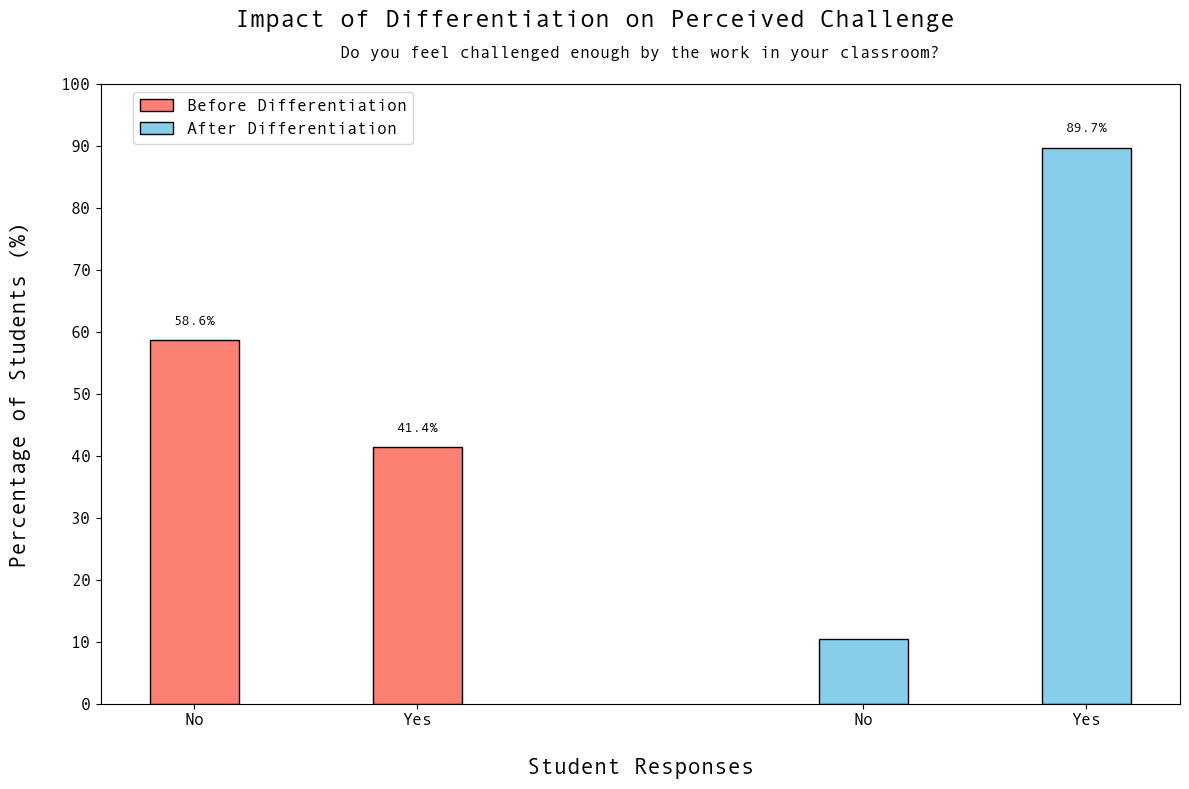

In [18]:
response_order = ['No',  'Yes']

bar_width = 0.4
x = np.arange(len(response_order))

x_before = x - bar_width / 2
x_after = x + bar_width / 2

q1_counts_raw = merged_student_questionnaire_df.groupby('questionnaire_type')['feel_challenged'].value_counts().unstack(fill_value=0)[response_order]
q1_counts_percent = q1_counts_raw.div(q1_counts_raw.sum(axis=1), axis=0) * 100

bar_width = 0.4
x_before = range(len(response_order))
x_after = [i + len(response_order) + 1 for i in x_before]

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x_before, q1_counts_percent.loc['Before'], width=bar_width,
       label='Before Differentiation', color='salmon', edgecolor='black')

ax.bar(x_after, q1_counts_percent.loc['After'], width=bar_width,
       label='After Differentiation', color='skyblue', edgecolor='black')

for idx, i in enumerate(x_before):
    height = q1_counts_percent.loc['Before'][response_order[idx]]
    ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

for idx, i in enumerate(x_after):
    height = q1_counts_percent.loc['After'][response_order[idx]]

x_all = list(x_before) + list(x_after)
x_labels = [f"{resp}" for resp in response_order] + [f"{resp}" for resp in response_order]
ax.set_xticks(x_all)
ax.set_xticklabels(x_labels)

plt.suptitle(
    "Impact of Differentiation on Perceived Challenge",
    fontname='Andale Mono',
    fontsize=18
)

ax.set_title(
    "Do you feel challenged enough by the work in your classroom?\n",
    fontname='Andale Mono',
    fontsize=12
)

ax.set_ylabel('Percentage of Students (%)\n', fontsize=16, fontfamily='Andale Mono')
ax.set_xlabel('\nStudent Responses', fontsize=16, fontfamily='Andale Mono')

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.xticks(fontname='Andale Mono')
plt.yticks(np.arange(0, 101, 10), fontname='Andale Mono')  # 0–100% by 10s

ax.legend(loc='upper center', bbox_to_anchor=(0.16, 1), prop={'size': 12, 'family': 'Andale Mono'})

ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

plt.savefig('graphs/student_questionnaire_2', dpi=300)
plt.tight_layout()
plt.show()


## Impact of Differentiation on Student Interest and Excitement

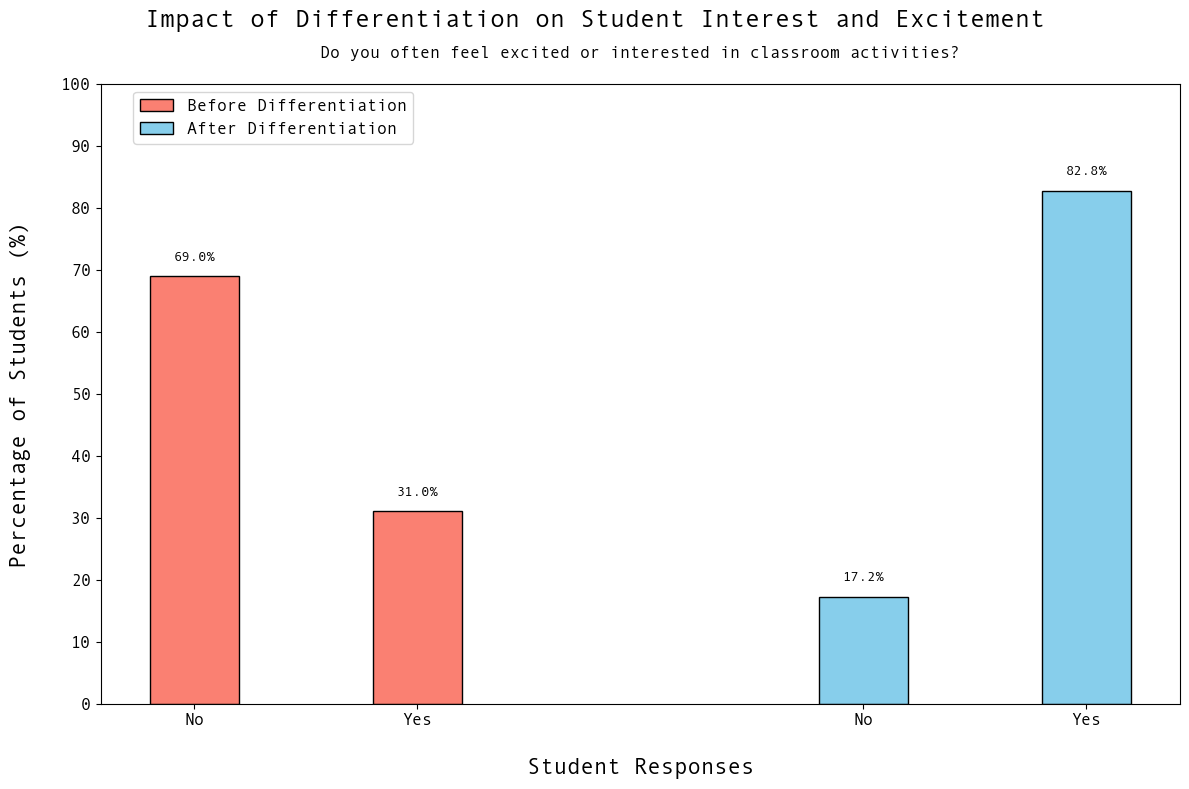

In [19]:
response_order = ['No',  'Yes']

q1_counts_raw = merged_student_questionnaire_df.groupby('questionnaire_type')['often_excited_interested_activities'].value_counts().unstack(fill_value=0)[response_order]
q1_counts_percent = q1_counts_raw.div(q1_counts_raw.sum(axis=1), axis=0) * 100

bar_width = 0.4
x_before = range(len(response_order))
x_after = [i + len(response_order) + 1 for i in x_before]

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x_before, q1_counts_percent.loc['Before'], width=bar_width,
       label='Before Differentiation', color='salmon', edgecolor='black')

ax.bar(x_after, q1_counts_percent.loc['After'], width=bar_width,
       label='After Differentiation', color='skyblue', edgecolor='black')

for idx, i in enumerate(x_before):
    height = q1_counts_percent.loc['Before'][response_order[idx]]
    ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

for idx, i in enumerate(x_after):
    height = q1_counts_percent.loc['After'][response_order[idx]]
    ax.text(i, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontname='Andale Mono')

x_all = list(x_before) + list(x_after)
x_labels = [f"{resp}" for resp in response_order] + [f"{resp}" for resp in response_order]
ax.set_xticks(x_all)
ax.set_xticklabels(x_labels)

plt.suptitle(
    "Impact of Differentiation on Student Interest and Excitement",
    fontname='Andale Mono',
    fontsize=18
)

ax.set_title(
    "Do you often feel excited or interested in classroom activities?\n",
    fontname='Andale Mono',
    fontsize=12
)

ax.set_ylabel('Percentage of Students (%)\n', fontsize=16, fontfamily='Andale Mono')
ax.set_xlabel('\nStudent Responses', fontsize=16, fontfamily='Andale Mono')

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
plt.xticks(fontname='Andale Mono')
plt.yticks(np.arange(0, 101, 10), fontname='Andale Mono')  # 0–100% by 10s

ax.legend(loc='upper center', bbox_to_anchor=(0.16, 1), prop={'size': 12, 'family': 'Andale Mono'})

plt.savefig('graphs/student_questionnaire_4', dpi=300)
plt.tight_layout()
plt.show()
